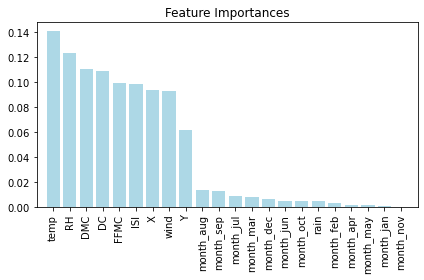

[2.85926668 1.5606242  1.33535812 1.26364484 0.92854773 0.20646792
 0.29614661 0.63095283 0.50578283 0.44098602]
0.590027700831025


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=',')


#Логистически регрессия

# удаляем "день"
del df['day']

# получаем номинальные характеристики
df = pd.get_dummies(df)


area_index = [i for i in range(0, df.shape[1]) if (df.columns[i] == 'area')]
nonarea_index = [i for i in range(0, df.shape[1]) if (df.columns[i] != 'area')]             

# извлекаем переменные из DataFrame
X = df.iloc[:, nonarea_index].values    
y = np.zeros(X.shape[0])
for i in range(0, X.shape[0]):
    if df['area'][i] == 0.0:
        y[i] = '0'
    else:
        y[i] = '1'
        
# разделяем тестовый набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

# стандартизируем
nonmonth_index = X.shape[1] - 12
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train[:, 0:nonmonth_index])
X_test_std = stdsc.transform(X_test[:, 0:nonmonth_index])

# добавляем информацию "месяц"
X_train_std = np.hstack((X_train_std, X_train[:, nonmonth_index:]))
X_test_std = np.hstack((X_test_std, X_test[:, nonmonth_index:]))


forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
feat_labels = df.columns[nonarea_index]
indices = np.argsort(importances)[::-1]

# рисуем важные хар-ки
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# анализируем главные компоненты
cov_mat = np.cov(X_train_std[:, :nonmonth_index].T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

# логистическая регрессия
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))





C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:1215: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


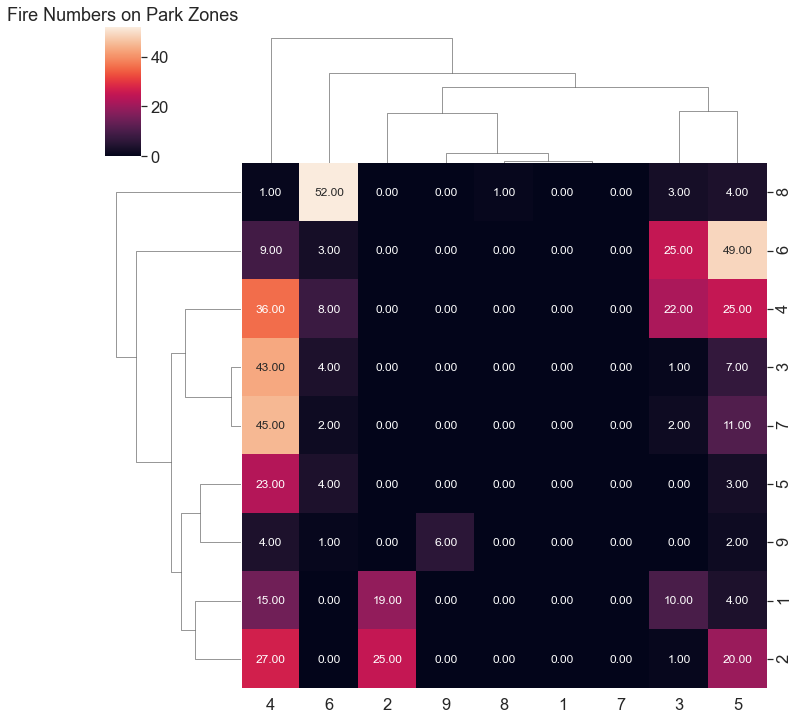

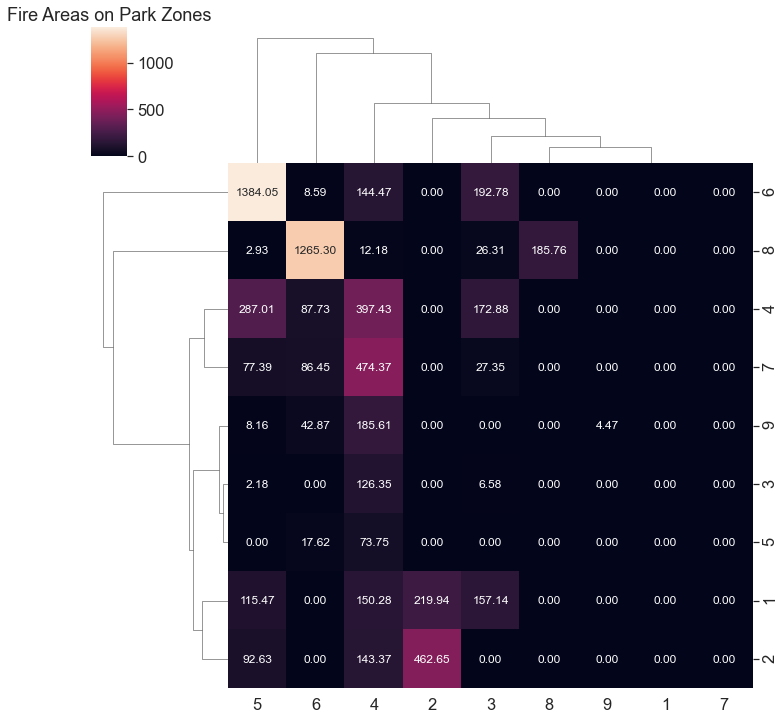

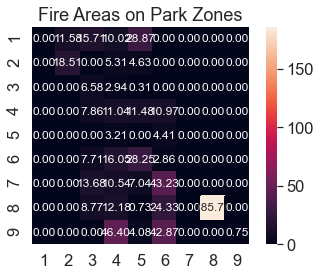

In [15]:
#Forest_fires_Decision_Tree_Ensemble

X = df.iloc[:, 0:10].values    
y= df.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=0)

# матрица корреляции 
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
firenum_map_mat = np.full((9, 9), 0.0)
firearea_map_mat = np.full((9, 9), 0.0)
firedensity = np.full((9, 9), 0.0)

for row in range(0, df.shape[0]):
    x = df['X'][row]-1
    y = df['Y'][row]-1
    firenum_map_mat[x, y] += 1
    firearea_map_mat[x, y] += df['area'][row]

for (x, y), value in np.ndenumerate(firenum_map_mat):
    if (firenum_map_mat[x, y] != 0):
        firedensity[x, y] = firearea_map_mat[x, y]/firenum_map_mat[x, y]

sns.set(font_scale=1.5)
heat_map = sns.clustermap(firenum_map_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Fire Numbers on Park Zones')
plt.show()

sns.set(font_scale=1.5)
heat_map = sns.clustermap(firearea_map_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Fire Areas on Park Zones')
plt.show()

sns.set(font_scale=1.5)
heat_map = sns.heatmap(firedensity,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Fire Areas on Park Zones')
plt.show()